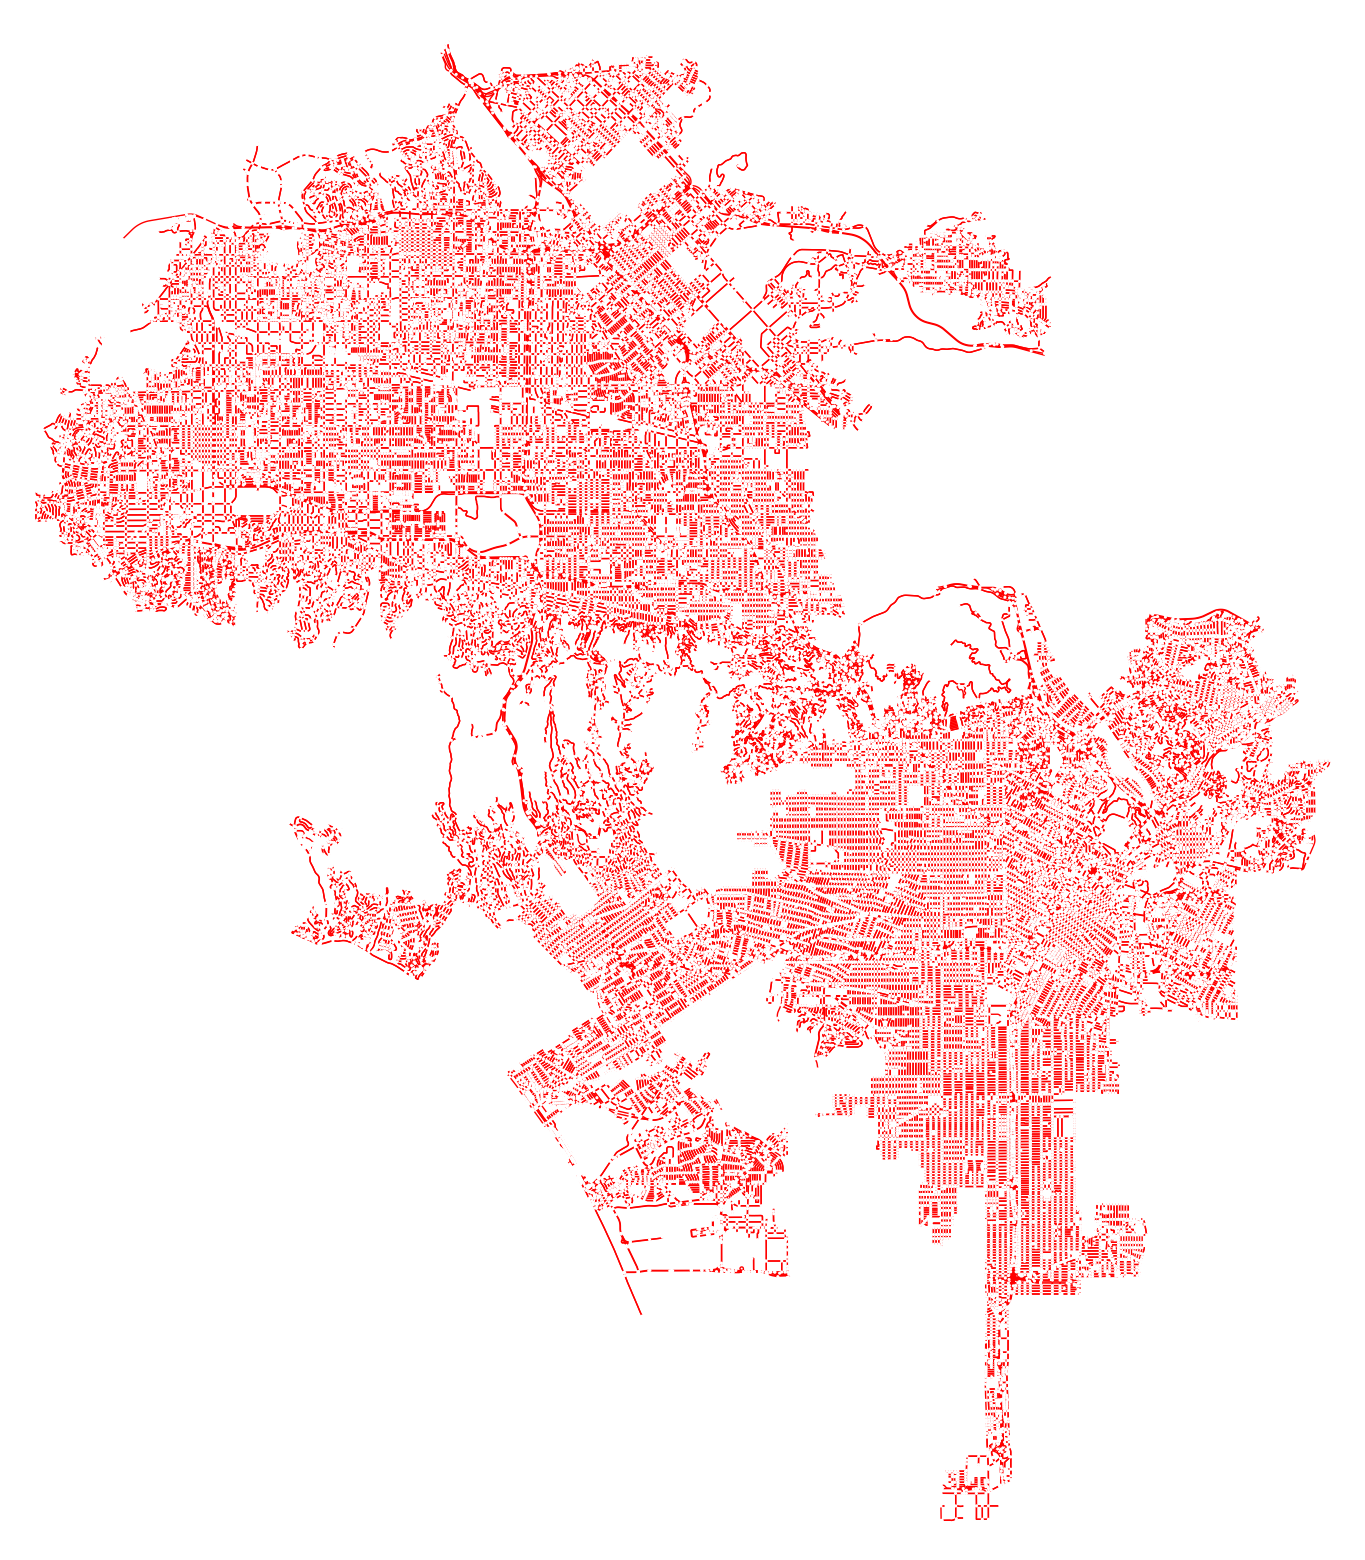

In [5]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Define the area (Los Angeles, California)
place_name = "Los Angeles, California, USA"

# Download road network for driving
G = ox.graph_from_place(place_name, network_type="drive")

# Plot the road network
fig, ax = plt.subplots(figsize=(20, 20))
ox.plot_graph(G, ax=ax, node_size=5, edge_color="red")
plt.show()


In [4]:
# Convert to a NetworkX graph
place_name = "Los Angeles, California, USA"
G = ox.graph_from_place(place_name, network_type="drive")
G = ox.add_edge_speeds(G)  # Adds speed limits
G = ox.add_edge_travel_times(G)  # Adds travel time

# Show basic stats
print(ox.basic_stats(G))


{'n': 49486, 'm': 135884, 'k_avg': 5.491815867113931, 'edge_length_total': 20852501.121315375, 'edge_length_avg': 153.45810486382044, 'streets_per_node_avg': 2.9523299519055897, 'streets_per_node_counts': {0: 0, 1: 8205, 2: 289, 3: 27062, 4: 13543, 5: 364, 6: 23}, 'streets_per_node_proportions': {0: 0.0, 1: 0.16580446995109727, 2: 0.005840035565614517, 3: 0.5468617386735642, 4: 0.273673362163036, 5: 0.00735561572970133, 6: 0.00046477791698662247}, 'intersection_count': 41281, 'street_length_total': 11310199.023369057, 'street_segment_count': 72499, 'street_length_avg': 156.00489694159998, 'circuity_avg': 1.04640425491564, 'self_loop_proportion': 0.0010758769086470158}


In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

# Step 1: Load Fire Prediction Data
# Simulated fire risk data (In real implementation, load actual predictions)
fire_data = {
    'location': ['A', 'B', 'C', 'D', 'E'],
    'fire_risk': [0.9, 0.7, 0.3, 0.1, 0.05]  # Higher value = higher risk
}
fire_df = pd.DataFrame(fire_data)

# Step 2: Define Road Network as a Graph
G = nx.DiGraph()

# Nodes (Locations) for Los Angeles to Fresno region
locations = {
    'A': (34.0522, -118.2437),  # Los Angeles
    'B': (35.0522, -118.2437),
    'C': (36.0522, -118.2437),
    'D': (36.7783, -119.4179),  # Fresno
}

for loc, coords in locations.items():
    G.add_node(loc, pos=coords)

# Edges (Roads with weights)
roads = [
    ('A', 'B', 50), ('B', 'C', 60), ('C', 'D', 80),
    ('A', 'C', 120), ('B', 'D', 140), ('A', 'D', 160)
]

for u, v, dist in roads:
    fire_risk = max(fire_df[fire_df['location'] == u]['fire_risk'].values[0], 
                    fire_df[fire_df['location'] == v]['fire_risk'].values[0])
    
    weight = dist + (fire_risk * 50)  # Higher weight for high fire risk
    G.add_edge(u, v, weight=weight)

# Step 3: Apply Bellman-Ford Algorithm
source = 'A'  # Evacuation start point (Los Angeles)
safe_zone = 'D'  # Destination (Fresno)

shortest_paths = nx.single_source_bellman_ford_path(G, source)
shortest_distance = nx.single_source_bellman_ford_path_length(G, source)

# Print evacuation route
print(f"Optimal Evacuation Route from {source} to {safe_zone}: {shortest_paths[safe_zone]}")
print(f"Total Risk-Adjusted Distance: {shortest_distance[safe_zone]}")

# Step 4: Visualize Road Network and Evacuation Route
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=42)  
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10)
edge_labels = {(u, v): f"{d['weight']:.1f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Graph Representation of Road Network and Fire Risk")
plt.show()

# Step 5: Interactive Map Visualization
m = folium.Map(location=[34.0522, -118.2437], zoom_start=7)  # Los Angeles as center

# Add nodes to the map
for loc, coords in locations.items():
    folium.Marker(location=coords, popup=loc, icon=folium.Icon(color='blue' if loc != safe_zone else 'green')).add_to(m)

# Add evacuation route to the map
route_coords = [locations[node] for node in shortest_paths[safe_zone]]
folium.PolyLine(route_coords, color="red", weight=5, opacity=0.8).add_to(m)

# Save and show the map
m.save("evacuation_route.html")
print("Evacuation route map saved as 'evacuation_route.html'")


In [ ]:
# Define evacuation start and destination
start_location = (34.0522, -118.2437)  # Example: Los Angeles
end_location = (36.7783, -119.4179)  # Example: Fresno

# Get nearest nodes on the graph
orig_node = ox.distance.nearest_nodes(G, start_location[1], start_location[0])
dest_node = ox.distance.nearest_nodes(G, end_location[1], end_location[0])

# Compute the shortest safe path (Dijkstra)
route = nx.shortest_path(G, orig_node, dest_node, weight="weight")

# Plot the route
fig, ax = plt.subplots(figsize=(10, 10))
ox.plot_graph_route(G, route, ax=ax, route_linewidth=3, node_size=10, bgcolor="white")
plt.show()
